In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

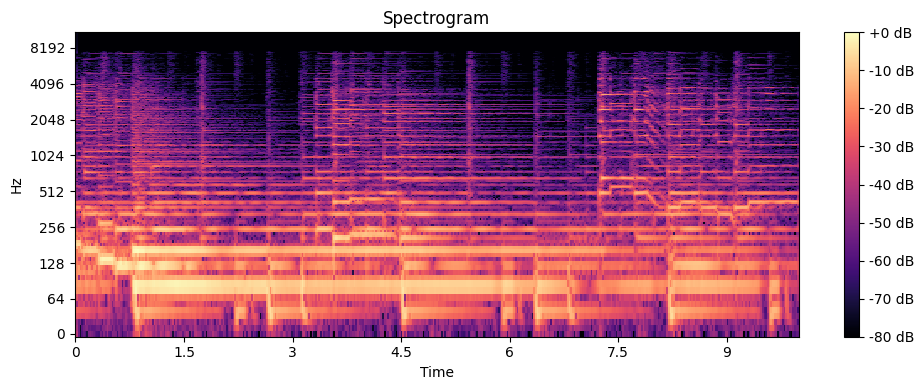

In [3]:
# Load the .wav file
filename = 'test.wav'  # replace with your .wav file
y, sr = librosa.load(filename)

# Compute the spectrogram magnitude and apply a logarithmic scale
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Display the log-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

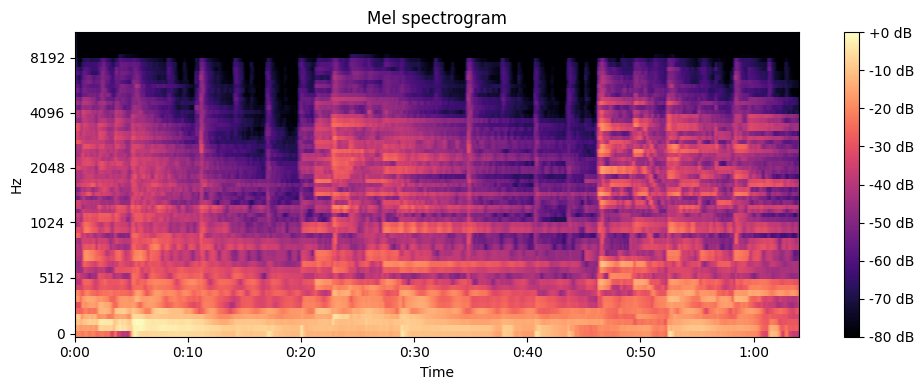

In [34]:
# Load the .wav file
filename = 'test.wav'  # replace with your .wav file
y, sr = librosa.load(filename)

# Compute a Mel-scaled spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64, hop_length = 80)

# Convert to log scale (dB). We'll use the peak power as reference.
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

In [35]:
log_mel_spectrogram.shape

(64, 2757)

In [7]:
y.shape

(220500,)

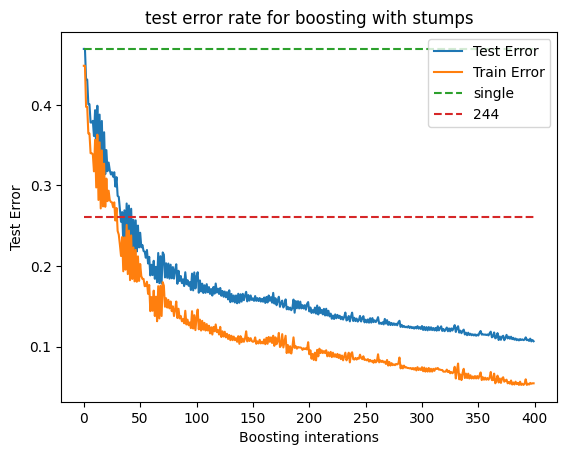

In [36]:

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the CSV file
data = pd.read_csv('Heart.csv')
data.drop(columns=data.columns[0], axis=1, inplace=True)

categorical_mapping = {'typical': 0, 'nontypical': 1, 'nonanginal': 2, 'asymptomatic': 3}
data['ChestPain'] = data['ChestPain'].replace(categorical_mapping)
categorical_mapping = {'normal': 0, 'fixed': 1, 'reversable': 2}
data['Thal'] = data['Thal'].replace(categorical_mapping)
categorical_mapping = {'No': 0, 'Yes': 1}
data['AHD'] = data['AHD'].replace(categorical_mapping)

X = data.drop('AHD', axis=1)  # Input features
y = data['AHD']  # Target variable

imputer = SimpleImputer(strategy='most_frequent')  # Replace with your desired strategy
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
oob_errors_bagging = []
oob_errors_rf = []
bagging_err = []
rf_err = []
single_tree = DecisionTreeClassifier()
single_tree.fit(X_train, y_train)
error_single_tree = 1 - single_tree.score(X_test, y_test)

# Calculate the value of m
plt.axhline(y=error_single_tree, color='red', linestyle='--', label='Single Tree')
rf = RandomForestClassifier(oob_score=True,max_features="sqrt",random_state=42)
bagging = BaggingClassifier(DecisionTreeClassifier(),oob_score=True, random_state=42)    
base_classifier = RandomForestClassifier(random_state=42,max_features="sqrt")
bagging_classifier = BaggingClassifier(DecisionTreeClassifier(),random_state=42)
       
for n in range(1,300):
    
    rf.set_params(n_estimators = n)
    # RandomForestClassifier with OOB evaluation
    rf.fit(X_train, y_train)
    oob_error_rf = 1 - rf.oob_score_
    oob_errors_rf.append(oob_error_rf)
    #error_rf = 1 - rf.score(X_test, y_test)
    # rf_err.append(error_rf)
    bagging.set_params(n_estimators = n)
    # BaggingClassifier with OOB evaluation
    bagging.fit(X_train, y_train)
    oob_error_bagging = 1 - bagging.oob_score_
    oob_errors_bagging.append(oob_error_bagging)
    # error_bagging = 1 - bagging.score(X_test, y_test)
    # bagging_err.append(error_bagging)

    #RandomForestClassifier
    base_classifier.set_params(n_estimators = n)
    #base_classifier = RandomForestClassifier(n_estimators=n,random_state=42,max_features="sqrt")
    base_classifier.fit(X_train, y_train)
    error_rf = 1 - base_classifier.score(X_test, y_test)
    rf_err.append(error_rf)

    #bagging_classifier
    bagging_classifier.set_params(n_estimators = n)
    #bagging_classifier = BaggingClassifier(DecisionTreeClassifier(),n_estimators=n, random_state=42)
    bagging_classifier.fit(X_train, y_train)
    error_bagging = 1 - bagging_classifier.score(X_test, y_test)
    bagging_err.append(error_bagging)

# Plotting the results
plt.plot(range(1,300), oob_errors_bagging, label='OOB Bagging')
plt.plot(range(1,300), oob_errors_rf, label='OOB Random Forest')
plt.plot(range(1,300), bagging_err, label='Test Bagging')
plt.plot(range(1,300), rf_err, label='Test Random Forest')

plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.title('Error on number of trees')
plt.legend()
#plt.show()
plt.savefig('problem3_graph.png')